# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rizky Prayogi Reksomulyo
- **Email:** rizki45645@gmail.com
- **ID Dicoding:** ogiiii

## Menentukan Pertanyaan Bisnis

- apakah musim memengaruhi jumlah pengendara biasa vs. pengendara terdaftar?
- Bagaimana cuaca memengaruhi jumlah pengendara biasa vs. pengendara terdaftar?
- Apa saja bulan-bulan yang paling ramai untuk penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



## Data Wrangling

### Gathering Data

In [5]:
# Membaca file hour.csv
df_hour = pd.read_csv('hour.csv')
print(df_hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Assessing Data

In [6]:
 # Menampilkan informasi tentang ringkasan statistik
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# Menampilkan informasi tentang data
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [8]:
# Mengecek data yang hilang
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
# Mengecek duplikasi
df_hour.duplicated().sum()

0

### Cleaning Data

In [10]:
# Menghapus kolom yang tidak relevan untuk analisis
df_hour = df_hour.drop(['instant'], axis=1)

In [11]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [12]:
# Buat objek MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transform kolom 'windspeed'
df_hour['windspeed'] = scaler.fit_transform(df_hour[['windspeed']])


In [13]:
df_hour.describe(

)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.223460,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.122840,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.228047,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.298225,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.143811,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Mengecek korelasi di antara kolom
df_hour[['season','weathersit','temp','windspeed','hum','atemp','mnth','casual','registered','cnt']].corr()

,season,weathersit,temp,windspeed,hum,atemp,mnth,casual,registered,cnt
season,1.000000,-0.014524,0.312025,-0.149773,0.150625,0.319380,0.830386,0.120206,0.174226,0.178056
weathersit,-0.014524,1.000000,-0.102640,0.026226,0.418130,-0.105563,0.005400,-0.152628,-0.120966,-0.142426
temp,0.312025,-0.102640,1.000000,-0.023125,-0.069881,0.987672,0.201691,0.459616,0.335361,0.404772
windspeed,-0.149773,0.026226,-0.023125,1.000000,-0.290105,-0.062336,-0.135386,0.090287,0.082321,0.093234
hum,0.150625,0.418130,-0.069881,-0.290105,1.000000,-0.051918,0.164411,-0.347028,-0.273933,-0.322911
atemp,0.319380,-0.105563,0.987672,-0.062336,-0.051918,1.000000,0.208096,0.454080,0.332559,0.400929
mnth,0.830386,0.005400,0.201691,-0.135386,0.164411,0.208096,1.000000,0.068457,0.122273,0.120638
casual,0.120206,-0.152628,0.459616,0.090287,-0.347028,0.454080,0.068457,1.000000,0.506618,0.694564
registered,0.174226,-0.120966,0.335361,0.082321,-0.273933,0.332559,0.122273,0.506618,1.000000,0.972151
cnt,0.178056,-0.142426,0.404772,0.093234,-0.322911,0.400929,0.120638,0.694564,0.972151,1.000000


In [37]:
df_hour.groupby(by="weathersit").cnt.sum()

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


In [38]:
df_hour.groupby(by="season").cnt.sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [39]:
df_hour.groupby(by="mnth").cnt.sum()

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


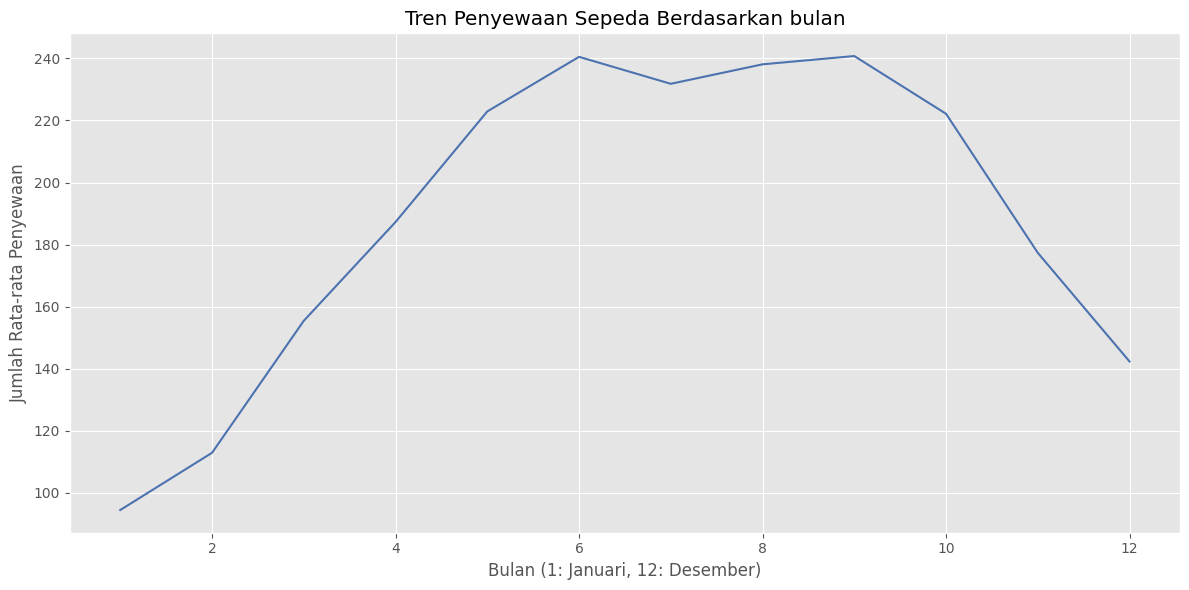

In [ ]:
plt.style.use('ggplot')
sns.set_palette("deep")

# 1. Tren penyewaan per jam
plt.figure(figsize=(12, 6))
monthly_rentals = df_hour.groupby('mnth')['cnt'].mean()
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values)
plt.title('Tren Penyewaan Sepeda Berdasarkan bulan')
plt.xlabel('Bulan (1: Januari, 12: Desember)')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.tight_layout()
plt.show()

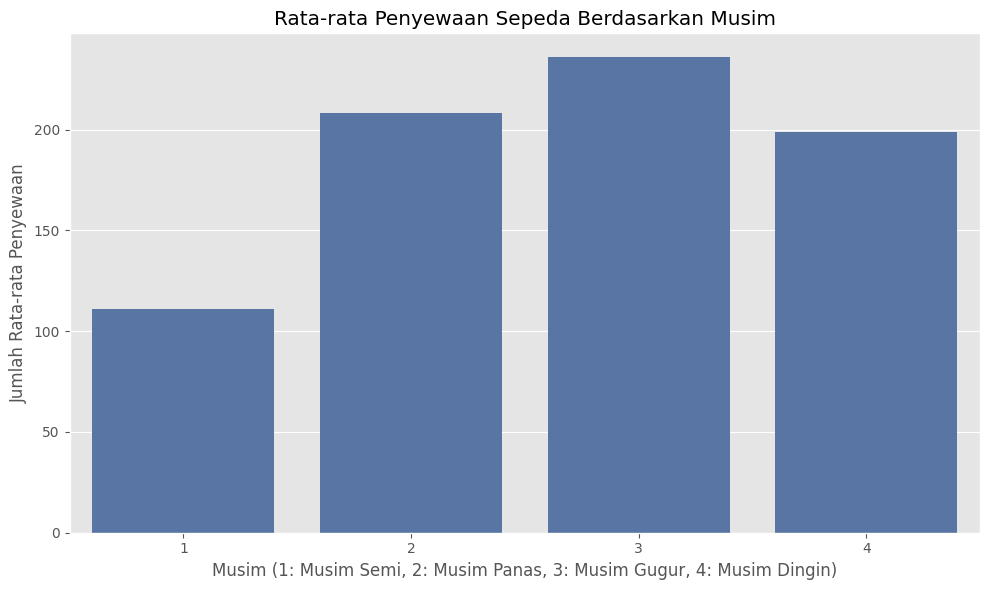

In [ ]:
# 2. Pola penyewaan musiman
plt.figure(figsize=(10, 6))
season_rentals = df_hour.groupby('season')['cnt'].mean()
sns.barplot(x=season_rentals.index, y=season_rentals.values)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.tight_layout()
plt.show()

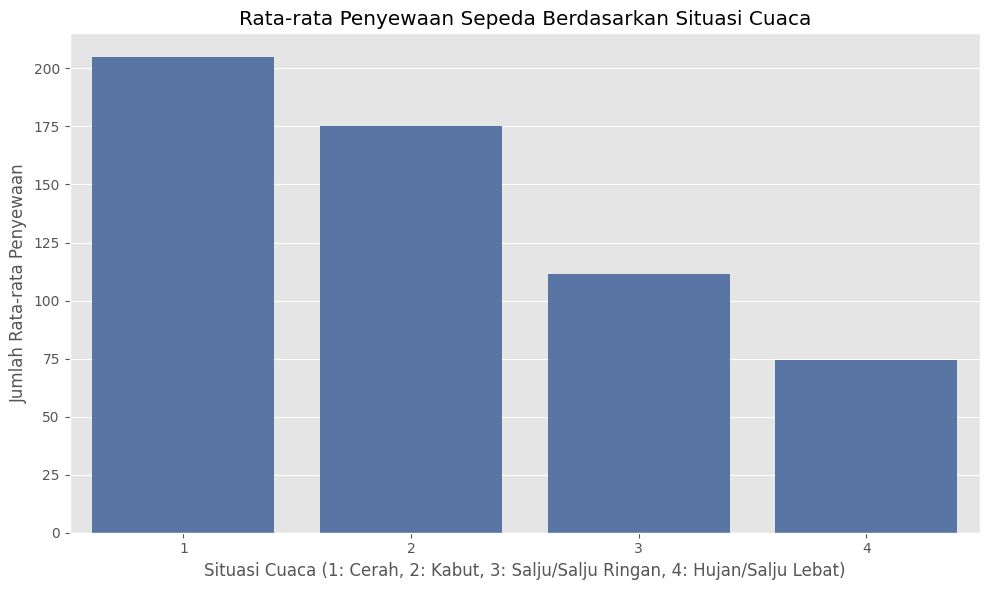

In [ ]:
# 3. Dampak cuaca terhadap penyewaan
plt.figure(figsize=(10, 6))
weather_rentals = df_hour.groupby('weathersit')['cnt'].mean()
sns.barplot(x=weather_rentals.index, y=weather_rentals.values)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca (1: Cerah, 2: Kabut, 3: Salju/Salju Ringan, 4: Hujan/Salju Lebat)')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

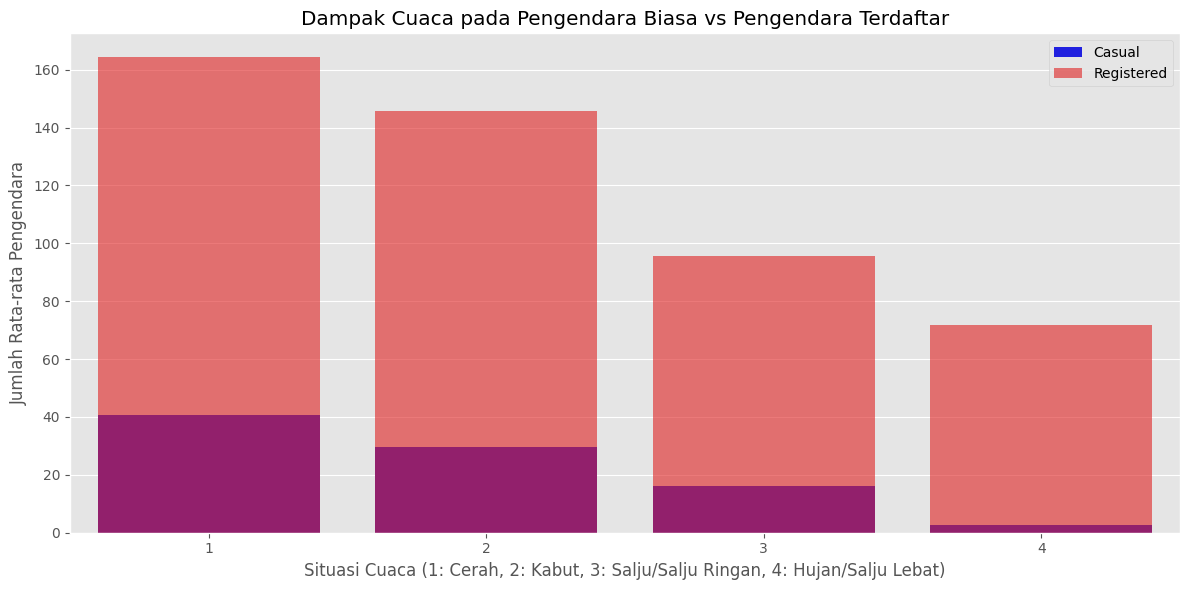

In [ ]:
# Memvisualisasikan dampak cuaca pada pengendara biasa vs pengendara terdaftar
plt.figure(figsize=(12, 6))
weather_casual = df_hour.groupby('weathersit')['casual'].mean()
weather_registered = df_hour.groupby('weathersit')['registered'].mean()

sns.barplot(x=weather_casual.index, y=weather_casual.values, color='b', label='Casual')
sns.barplot(x=weather_registered.index, y=weather_registered.values, color='r', label='Registered', alpha=0.6)

plt.title('Dampak Cuaca pada Pengendara Biasa vs Pengendara Terdaftar')
plt.xlabel('Situasi Cuaca (1: Cerah, 2: Kabut, 3: hujan/Salju Ringan, 4: Hujan/Salju Lebat)')
plt.ylabel('Jumlah Rata-rata Pengendara')
plt.legend()
plt.tight_layout()
plt.show()





### Pertanyaan 2:

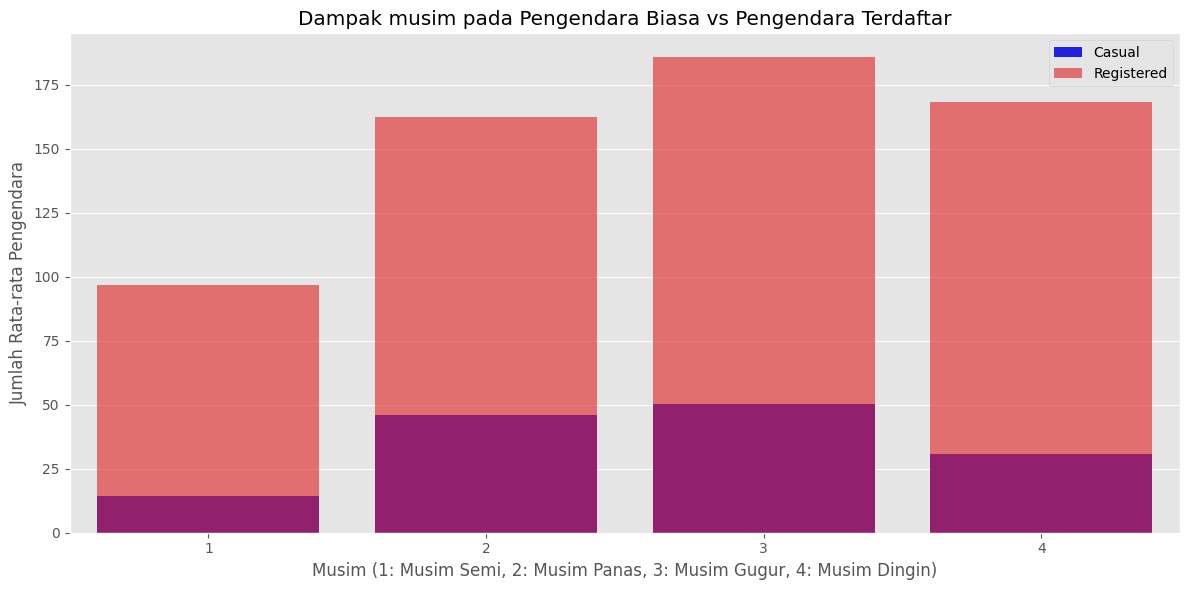

In [ ]:
# Memvisualisasikan dampak musim pada pengendara kasual vs pengendara terdaftar
plt.figure(figsize=(12, 6))
season_casual = df_hour.groupby('season')['casual'].mean()
season_registered = df_hour.groupby('season')['registered'].mean()

sns.barplot(x=season_casual.index, y=season_casual.values, color='b', label='Casual')
sns.barplot(x=season_registered.index, y=season_registered.values, color='r', label='Registered', alpha=0.6)

plt.title('Dampak musim pada Pengendara Biasa vs Pengendara Terdaftar')
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Jumlah Rata-rata Pengendara')
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 3:

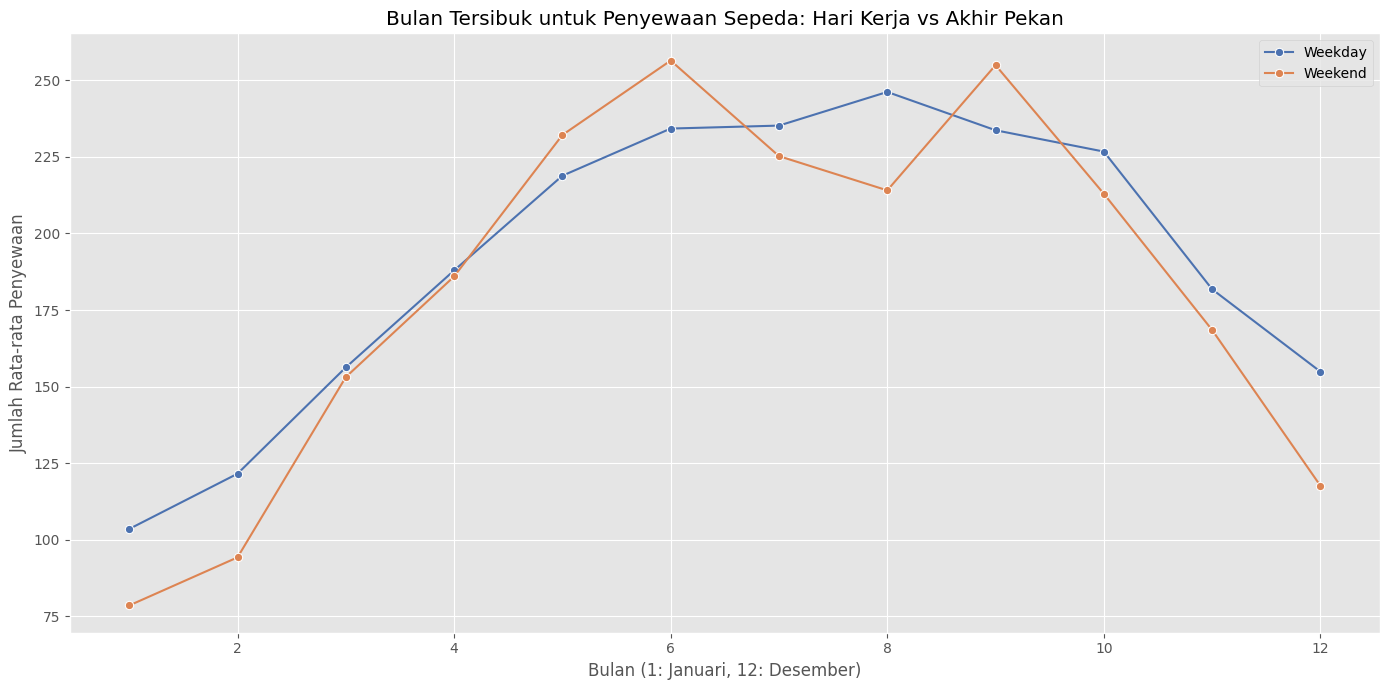

In [ ]:
# Visualisasikan bulan tersibuk untuk penyewaan sepeda, dengan membandingkan Weekday dan Weekend
plt.figure(figsize=(14, 7))
month_weekday = df_hour[df_hour['workingday'] == 1].groupby('mnth')['cnt'].mean()
month_weekend = df_hour[df_hour['workingday'] == 0].groupby('mnth')['cnt'].mean()

sns.lineplot(x=month_weekday.index, y=month_weekday.values, label='Weekday', marker='o')
sns.lineplot(x=month_weekend.index, y=month_weekend.values, label='Weekend', marker='o')

plt.title('Bulan Tersibuk untuk Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Bulan (1: Januari, 12: Desember)')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

- kondisi cuaca secara signifikan mempengaruhi pengendara kasual lebih banyak daripada pengendara yang terdaftar.Jumlah rata-rata pengendara kasual menurun secara signifikan saat cuaca memburuk sebanyak.
- kondisi musim berdampak tapi tidak terlalu signifikan mempengaruhi pengendara kasual ataupun pengendara yang terdaftar. Hanya pada musim semi pengendara cukup mengalami menurunan.
- bulan-bulan musim gugur dan panas adalah periode puncak untuk penyewaan sepeda, terlepas dari hari apa pun dalam seminggu.